In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

**Loading data**

In [3]:
data_dir = r"D:\My Work\Syllabus\SDGP\Datasets\Model\Dataset"

In [4]:
path = os.path.join(data_dir,"Apple")

In [5]:
print(os.path.exists(path))

True


In [6]:
train_dir = os.path.join(path,"Train")
test_dir = os.path.join(path,"Test")

In [7]:
train_good_apples = os.path.join(train_dir,"Good apples")
train_bad_apples = os.path.join(train_dir,"Bad apples")
test_good_apples = os.path.join(test_dir,"Good apples")
test_bad_apples = os.path.join(test_dir,"Bad apples")

In [8]:
num_good_apples_train = len(os.listdir(train_good_apples))
num_bad_apples_train = len(os.listdir(train_bad_apples))
num_good_apples_test = len(os.listdir(test_good_apples))
num_bad_apples_test = len(os.listdir(test_bad_apples))

total_train = num_good_apples_train + num_bad_apples_train
total_test = num_good_apples_test + num_bad_apples_test

In [9]:
print('Total training Good apples: ', num_good_apples_train)
print('Total training Bad apples: ', num_bad_apples_train)

print('Total testing Good apples: ', num_good_apples_test)
print('Total testing Bad apples: ', num_bad_apples_test)

print("--")
print("Total training apples: ", total_train)
print("Total testing apples: ", total_test)

Total training Good apples:  1100
Total training Bad apples:  1100
Total testing Good apples:  400
Total testing Bad apples:  400
--
Total training apples:  2200
Total testing apples:  800


In [26]:
batch_size = 64
epochs = 15
IMG_HEIGHT = 100
IMG_WIDTH = 100

In [27]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for training data
test_image_generator = ImageDataGenerator(rescale=1./255) # Generator for testing data

In [28]:
train_gen = train_image_generator.flow_from_directory(batch_size = batch_size, directory = train_dir, target_size = (IMG_HEIGHT,IMG_WIDTH), class_mode = 'binary')

Found 2200 images belonging to 2 classes.


In [29]:
test_gen = test_image_generator.flow_from_directory(batch_size = batch_size, directory = test_dir, target_size = (IMG_HEIGHT,IMG_WIDTH), class_mode = 'binary')

Found 800 images belonging to 2 classes.


In [30]:
class_array = ['Good Apples','Bad Apples']

**Creating the model**

In [32]:
model = Sequential([
    Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(IMG_HEIGHT,IMG_WIDTH,3)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Conv2D(filters=32, kernel_size=(5, 5), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Conv2D(filters=64, kernel_size=(5, 5), activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [33]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 96, 96, 16)        1216      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 48, 48, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 48, 48, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 44, 44, 32)        12832     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 18, 18, 64)       

In [34]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [35]:
history = model.fit_generator(
    train_gen,
    steps_per_epoch=total_train,
    epochs=epochs,
    validation_data=test_gen,
    validation_steps=total_test
)

Epoch 1/15
2200/2200 [==============================] - 2684s 1s/step - loss: 0.0774 - accuracy: 0.9683 - val_loss: 0.0757 - val_accuracy: 0.9738
Epoch 2/15
2200/2200 [==============================] - 2760s 1s/step - loss: 0.0093 - accuracy: 0.9969 - val_loss: 0.2622 - val_accuracy: 0.9262
Epoch 3/15
2200/2200 [==============================] - 1785s 811ms/step - loss: 0.0076 - accuracy: 0.9977 - val_loss: 0.0811 - val_accuracy: 0.9800
Epoch 4/15
2200/2200 [==============================] - 1766s 803ms/step - loss: 0.0033 - accuracy: 0.9990 - val_loss: 0.0988 - val_accuracy: 0.9775
Epoch 5/15
2200/2200 [==============================] - 1678s 763ms/step - loss: 0.0029 - accuracy: 0.9992 - val_loss: 0.0670 - val_accuracy: 0.9862
Epoch 6/15
2200/2200 [==============================] - 1617s 735ms/step - loss: 0.0048 - accuracy: 0.9988 - val_loss: 0.0913 - val_accuracy: 0.9763
Epoch 7/15
2200/2200 [==============================] - 2554s 1s/step - loss: 4.0915e-05 - accuracy: 1.0000 - va

Text(0.5, 1.0, 'Training and Validation Loss')

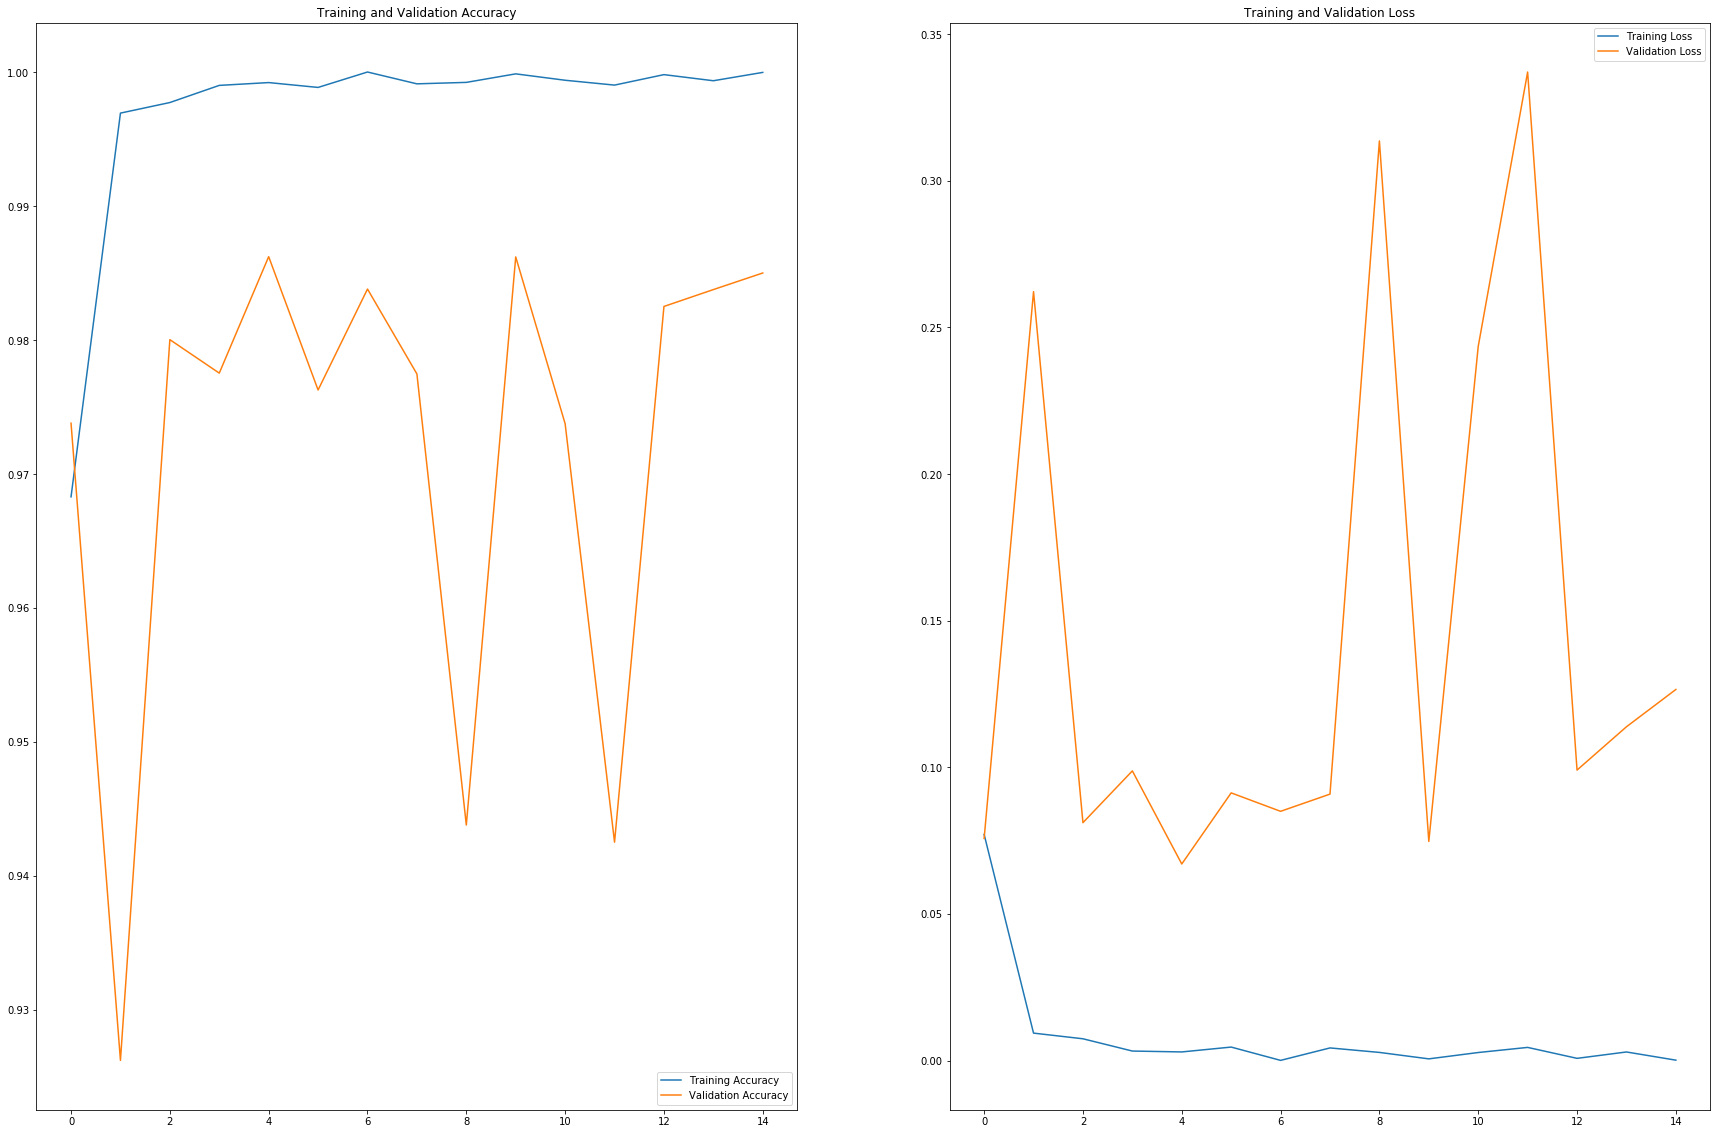

In [36]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(30, 20))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')

plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

In [37]:
model.save('sdgp_fresty.h5')